# Electromechanical clock

An electromechanical clock keeps time by oscillating a charge between two electrodes. This was represented by Dou, et al., as a 4-state Markov model with (column-normalized) rate matrix
\begin{equation}
R=
\left(\begin{matrix}
-(k_{c}+k_{m}e^{-\Delta F}) & k_{c} & 0 & k_{m}e^{-\Delta F} \\
k_{c}e^{\Delta F-A/2} & -(k_{m}+k_{c}e^{\Delta F-A/2}) & k_{m} & 0 \\
0 & k_{m}e^{-\Delta F} & -(k_{c} + k_{m}e^{-\Delta F}) & k_{c} \\
k_{m} & 0 & k_{c}e^{\Delta F-A/2} & -(k_{m} + k_{c}e^{\Delta F-A/2})
\end{matrix}\right).
\end{equation}
The parameters of this model are as follows. $k_{m}$ and $k_{c}$ are kinetic rate constants for particle motion, which is fixed to $k_{m}=1$ to ensure that transfer begtween electrodes can occur, and charge transfer ($k_{c}$). Transitioning between states 1 and 2 or 3 and 4 corresponds to charge transfer, which requires the rate constant $k_{c}$, and transitioning between states 1 and 4 or 2 and 3 corresponds to particle motion which requires the rate constant $k_{m}$. $F$ is the free energy difference between the two energy levels (states 1 and 3 vs. states 2 and 4). $A$ is the affinity
\begin{equation}
A=\frac{2eV}{k_{B}T}
\label{affinity}
\end{equation}
of transferring two electrons (2eV) between the two electrodes at some temperature $T$. The negative of the escape rate from each state, the sum of the transitions out of a particular state
\begin{equation}
w_{x_{i}}=\sum_{j\neq i} w(x_{j} \vert x_{i}),
\end{equation}
is given on the diagonal of the rate matrix.
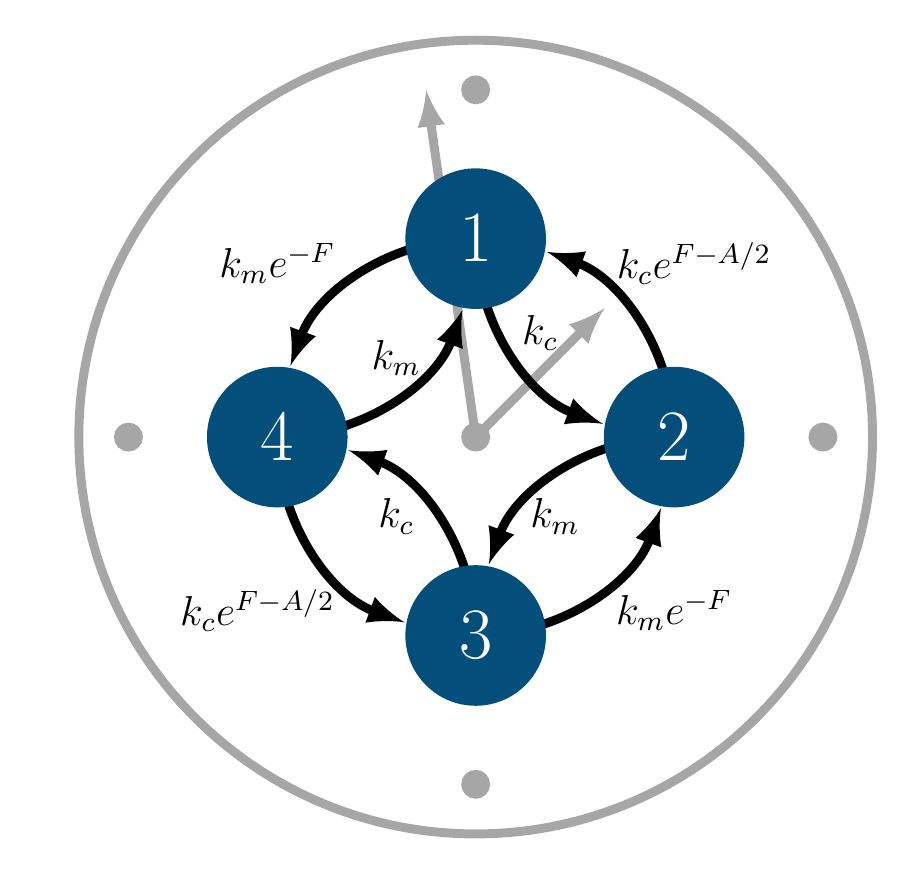

Let us now assume that we want this clock to keep track of very small increments of time. Speed is then important to the function of this clock. This timekeeping also has some amount of precision in this timekeeping and an associated energetic and entropic cost of operating. The speed and dissipation can be quantified over a path-- a sequence of time-ordered states representing the path a particle takes between these two electrodes and the charge of that particle.
For some path $\mathcal{C}_{n}=x_{0},x_{1},x_{2},...,x_{n-1},x_{n}$, the speed of that path is given by the sum of the mean time waiting in each state along the path:
\begin{equation}
\langle 1 / \tau \rangle_{\mathcal{C}_{n}}=\sum_{i=0}^{n} \frac{1}{w_{x_{i}}}
\end{equation}
The entropy dissipated by traversal of a single path is given by the negative of the entropy flow:
\begin{equation}
-s_{e}[\mathcal{C}_{n}]=-\ln \frac{\prod_{i=1}^{n} w(x_{i} \vert x_{i-1})}{\prod_{j-1}^{n} w(x_{j-1} \vert x_{j})}
\end{equation}

These path-level observables can be averaged over a group of paths, an ensemble.
We are interested in the trend of these observables in time, so we will create groups of paths that are binned in time based on their mean occurrence time $\langle \tau \rangle_{\mathcal{C}_{n}}$. The value of each paths' mean occurrence time will fall into a single uniform-length ($\Delta t$) time bin. The observables $\mathcal{O}_{\mathcal{C}_{n}}$ of these paths can then be averaged to a single value representing that point in time:
\begin{equation}
\langle \mathcal{O} \rangle_{t}=\sum_{t}^{t+\Delta t} \mathcal{O}_{\mathcal{C}_{n}} p(\mathcal{C}_{n},\langle \tau \rangle_{\mathcal{C}_{n}})
\end{equation}
This yields a time series of values of each observable.

The precision of timekeeping can also be defined over an ensemble.
The spread of measured time by a path can be characterized through the moments of the path occurrence time distribution.
We will use the relative variance
\begin{equation}
\sigma^{2}(\tau) / \langle \tau \rangle^{2}= \frac{\langle \tau^{2} \rangle-\langle \tau \rangle^{2}}{\langle \tau \rangle^{2}}
\end{equation}
for this.
A larger relative variance corresponds to a larger spread of values of the time measured, which means worse precision.
We can therefore consider the inverse of the relative variance as a measure of precision.
As the inverse of the relative variance increases, so does the precision. The following are each observable's time series plotted in time.

Number of paths is 170
Length of longest path is 9


Text(0.5, 0, 'Time')

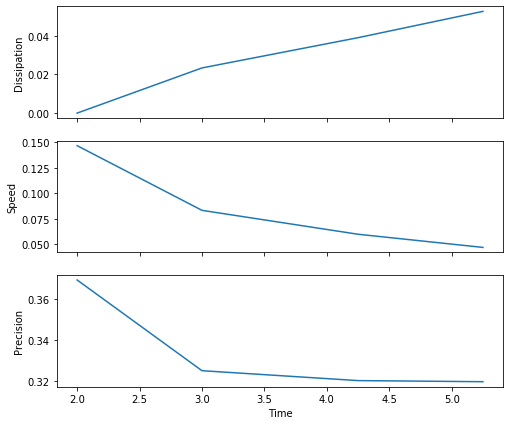

In [207]:
import math
import matplotlib
import matplotlib.pyplot as plt

# Parameter values
km = 1
kc = 1
F = 1
A = 1

# Size of time bins
dt = 0.25

#Declarations
temp = []
paths = []
allpaths = []
newpaths = []
prob = []
time = []
speed = []
diss = []
tsquared = []
R = []
wx = []
t_time = []
t_speed = []
t_diss = []
t_prec = []
t_mtime = []

# Path generation
paths = [[1,2],[1,4]]
nmax = 10
npath = 0
for i in range(2,nmax):
    newpaths.clear()
    for j in range(0,len(paths),1):
        if (paths[j][-1] == 1) or (paths[j][-1] == 3):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 2) or (paths[j][-1] == 4):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            allpaths.append(list(temp))
            temp.pop()
            temp.append(3)
            newpaths.append(list(temp))
            npath+=1
        else:
            print("Invalid state!\n")
    paths.clear()
    paths = list(newpaths)
            
print("Number of paths is",npath)
print("Length of longest path is",len(allpaths[-1]))
#print(allpaths)

# Rate matrix and escape rates
R = [[float(0)]*4]*4
R[0]=[-1 * (kc + km * math.exp(-1 * F)),kc,0,km * math.exp(-1*F)]#1
R[1]= [float(kc*math.exp(F-(A/2))),float(-km-kc*math.exp(F-(A/2))),float(km),float(0)]#2
R[2]= [float(0),float(km*math.exp(-1*F)),float(-kc-km*math.exp(-1*F)),float(kc)]#3
R[3]= [float(km),float(0),float(kc*math.exp(F-(A/2))),float(-km-kc*math.exp(F-(A/2)))]#4
wx.append(float(kc + (km*(math.exp(-1*F)))))#1
wx.append(float(km + kc*(math.exp(F-(A/2)))))#2
wx.append(float(kc + (km * (math.exp(-1*F)))))#3
wx.append(float(km + kc*math.exp(F-(A/2))))#4

# Observable determination along paths
margp = 1
time = []
speed = []
diss = []
prob = []
for i in range(0,len(allpaths),1):
    time.append(float(0))
    for j in range(0,len(allpaths[i]),1):
        time[i]+=(1/wx[int(allpaths[i][j]-1)])
    speed.append(float(1/time[i]))
    prob.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        prob[i] = prob[i] * float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/wx[int(allpaths[i][j-1]-1)])
    diss.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        extra = float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)])
        diss[i]*=float(extra)
        extra = float(R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)])
        diss[i]/=float(extra)
        #diss[i]-=float(math.log(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)]))
    diss[i] = float(math.log(diss[i]))

sumpr = float(0)
for i in range(0,len(allpaths),1):
    sumpr+=float(prob[i])
for i in range(0,len(allpaths),1):
    prob[i]/=float(sumpr)
    
# Average to time ensemble
nt = math.ceil(max(time)/dt)
t_time = [float(0)]*(nt+1)
for i in range(0,nt+1):
    t_time[i]=i*dt
#t_time = list(range(0,dt*nt,dt))
t_speed = [float(0)]*nt
t_diss = [float(0)]*nt
tsquared=[float(0)]*nt
t_mtime = [float(0)]*nt
t_prec = [float(0)]*nt
for i in range(0,len(t_time)-1,1):
    occ.clear()
    ef.clear()
    probs.clear()
    for j in range(0,len(allpaths),1):
        if (time[j] >= t_time[i]) and (time[j] <= t_time[i+1]):
            occ.append(float(time[j]))
            ef.append(float(diss[j]))
            probs.append(float(prob[j]))
    t_speed[i] = float(0)
    t_diss[i] = float(0)
    tsquared[i] = float(0)
    t_mtime[i] = float(0)
    for j in range(0,len(occ),1):
        extra = float(probs[j] * occ[j])
        t_mtime[i]+=float(extra)
        if occ[j] > 0:
            extra=float(probs[j]/occ[j])
            t_speed[i]+=float(extra)
        extra=float(probs[j] * ef[j])
        t_diss[i]+=float(extra)
        extra=float(float(math.pow(occ[j],2)) * probs[j])
        tsquared[i]+=float(extra)
    t_prec[i] = float(tsquared[i]-math.pow(t_mtime[i],2))
    extra = float(math.pow(t_mtime[i],2))
    if t_mtime[i] > 0:
        t_prec[i]/=float(math.pow(t_mtime[i],2))
        t_prec[i] = float(1/t_prec[i])
    else:
        t_prec[i] = 0
        
# Time ensemble neglecting zero elements
finaltimes = list(t_time)
del finaltimes[0]
for i in range(len(t_speed)-1,-1,-1):
    if t_mtime[i] == 0:
        del t_speed[i]
        del t_diss[i]
        del t_mtime[i]
        del t_prec[i]
        del finaltimes[i]

# Plots
fig = plt.figure(figsize=(8,7))
ax = fig.subplots(sharex=True,sharey=False,ncols=1,nrows=3)
plt.sca(ax[0])
ax[0].plot(finaltimes,t_diss)
ax[0].set_ylabel('Dissipation')
plt.sca(ax[1])
ax[1].plot(finaltimes,t_speed)
ax[1].set_ylabel('Speed')
plt.sca(ax[2])
ax[2].plot(finaltimes,t_prec)
ax[2].set_ylabel('Precision')
ax[2].set_xlabel('Time')

Each of our three observables of interest has a trend in time, shown above. The dissipation increases with increasing time, the speed decreases with increasing time, and the precision decreases with increasing time. This means that at early times, all three of our observables are at their most optimal values. This clock is therefore best at precisely measuring small increments of time with great precision and minimal dissipative losses.